In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
#importing data
data = pd.read_csv(r'C:\Users\viral\OneDrive\Desktop\Air-Quality-Index-Analysis\data\aqi_scaled.csv') #change path according to you

In [81]:
data.shape

(15169, 8)

In [82]:
data.head()

,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,0.321787,0.010030,0.289898,0.023973,0.260175,0.668815,0.659978,0.551818
1,0.460346,0.107414,0.370809,0.000565,0.382894,0.775646,0.783901,0.793117
2,0.584321,0.243760,0.418761,0.001942,0.494464,0.856636,0.876643,0.950612
3,0.584321,0.235487,0.466670,0.011351,0.568767,0.839820,0.863416,0.930974
4,0.562443,0.198327,0.496656,0.030293,0.643147,0.827175,0.855412,0.901419


In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15169 entries, 0 to 15168
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   co      15169 non-null  float64
 1   no      15169 non-null  float64
 2   no2     15169 non-null  float64
 3   o3      15169 non-null  float64
 4   so2     15169 non-null  float64
 5   pm2_5   15169 non-null  float64
 6   pm10    15169 non-null  float64
 7   nh3     15169 non-null  float64
dtypes: float64(8)
memory usage: 948.2 KB


In [84]:
data.isnull().sum()

co       0
no       0
no2      0
o3       0
so2      0
pm2_5    0
pm10     0
nh3      0
dtype: int64

In [85]:
data.duplicated().sum()

0

In [86]:
# correlation between each pair of the features
corr = data.corr()

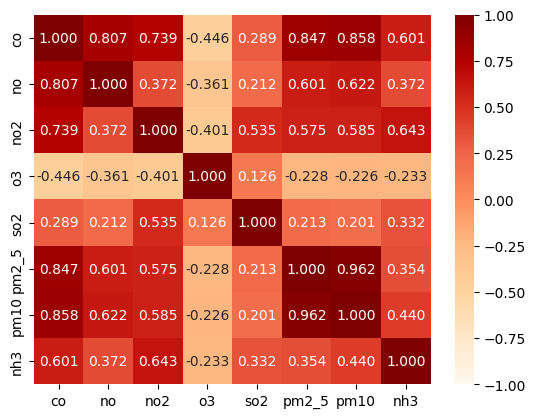

In [87]:
sns.heatmap(corr,cmap='OrRd',vmin=-1,vmax=1,annot=True,fmt='.3f')
plt.show()

In [88]:
target = 'pm10'

#function to find most correlated feature
def find_best_feature(target):
    max = None
    for i,j in zip(corr[target],corr.index):
        if j==target : continue
        if max==None:
            max=j
        if i>corr[target][max] and i!=1:
            max=j
    return max

print('most correlated feature for {} is {}'.format(target,find_best_feature(target)))

most correlated feature for pm10 is pm2_5


In [89]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [90]:
target='pm2_5'

X_train,X_test,y_train,y_test = train_test_split(data[[find_best_feature(target)]],data[target],test_size=0.2,random_state=2)

#model to predict the target by best correlated feature
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [91]:
from sklearn.metrics import r2_score

In [92]:
#testing the model by r2 score
r2_score(model.predict(X_test), y_test)

0.9208125178846164

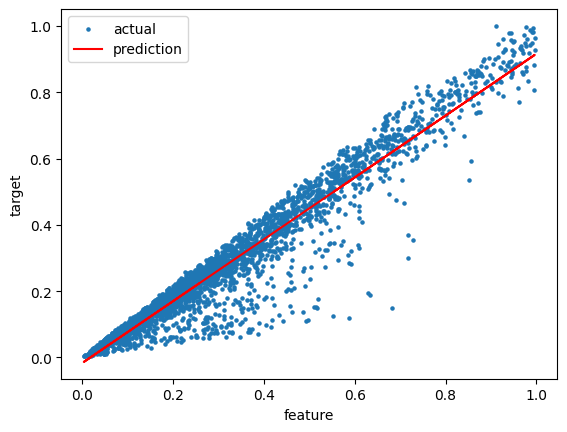

In [93]:
plt.scatter(X_test,y_test,s=5,label='actual')
plt.plot(X_test,model.predict(X_test),color='r',label='prediction')
plt.xlabel('feature')
plt.ylabel('target')
plt.legend()
plt.show()